<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Random_Forest_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest Classifier

Frome our earlier example fosugin on Decision Trees, we identified a tree as a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. 

A random forest classifier uses a number of trees, thus forming a forest!! The thicker the forest (the more the trees), the more robust the random forest classifier. Random forests create decision trees aon randomly selected data sampels, get predictions from all the trees, and determing the solution through voting. That is why random forest are under the heading of ensemble models in SKlearn. They are an ensemble of decision trees, with the final decision being the vote from all the decision trees.

Random forests is a supervised learning algorithm. It can be used both for classification and regression.   


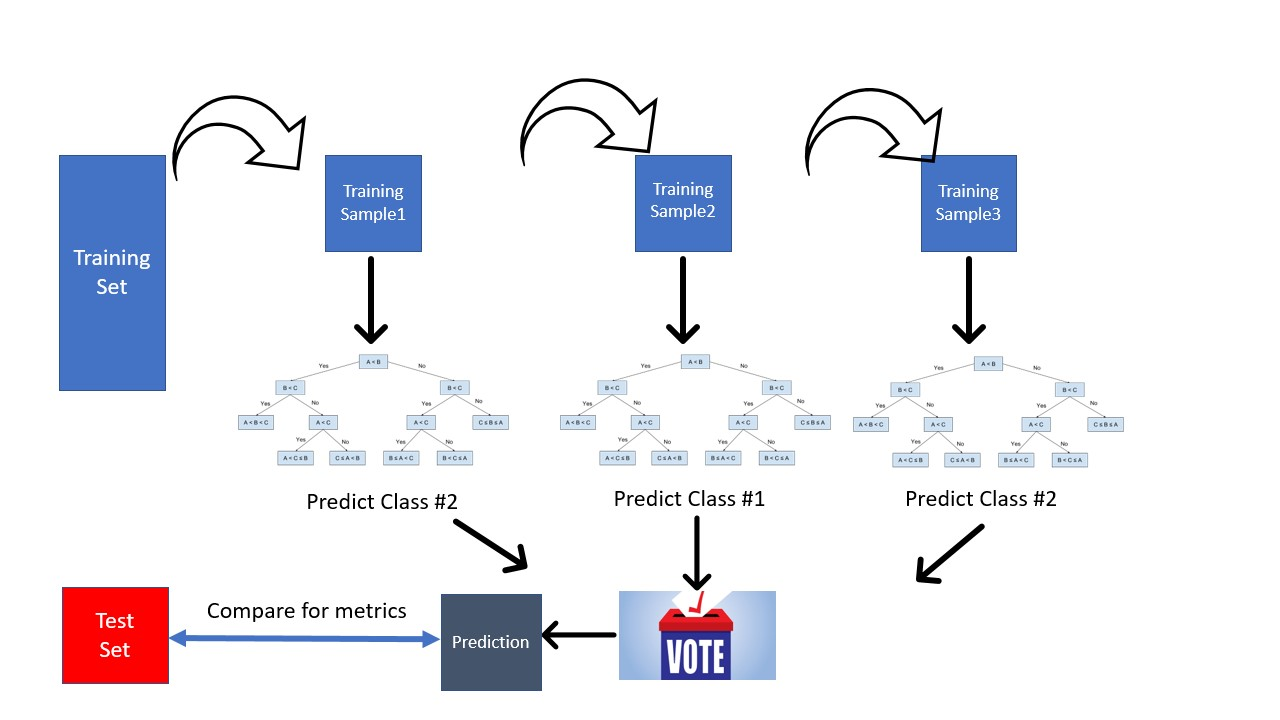

##Example: Where is your wine from?!

We will use the Wine dataset from sklearn.

The details of the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/wine

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.



In [1]:
import sklearn
import numpy as np

#getting the wine quality dataset
from sklearn.datasets import load_wine
dataset = load_wine()

from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.30, random_state = 45)

The **features (attributes)** are: 

1. Alcohol level
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline 


In [2]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']


There are three **classes** for the different areas in Italy where the wine is cultivated: 
Class0, Class1, Class 2

In [3]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Note that this is not a binary classifier because there is more than just two choices when it comes to the predicted classes

Next, we build the classifier...

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
classifier = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Let's take a look at the confusion matrix for three classes

In [6]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 20]])

Text(0.5, 764.32, 'Predicted label')

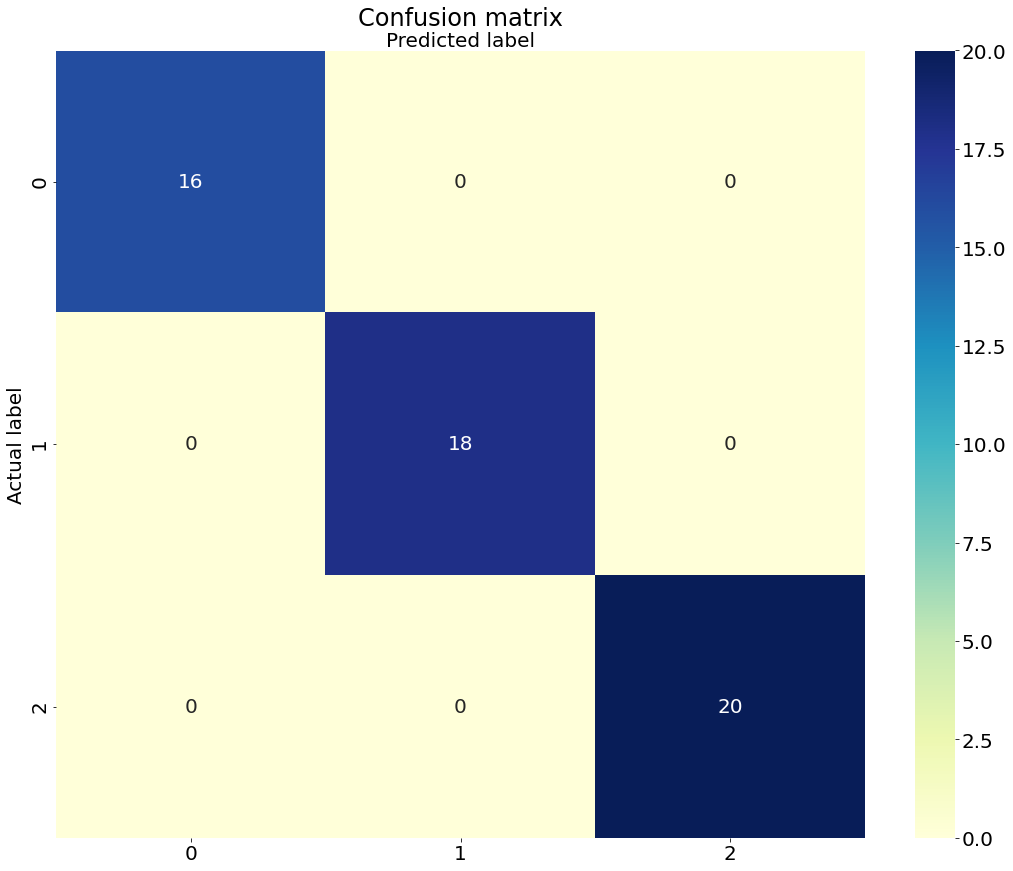

In [7]:
# import required modules
import pandas as pd
import numpy as np
#this is a different plotting package
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(15,12)})

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The metrics are a little different here. Notice that instead of the average saying 'binar' as it did in the other two examples (binary classifiers) is set to macro. This will count the true positives, true negatives, false positives, and false negatives across all three classifiers. 

In [8]:
print('{:<15s}{:<20s}'.format('Accuracy:',str(metrics.accuracy_score(y_test,y_pred))))
print('{:<15s}{:<20s}'.format('Precision:',str(metrics.precision_score(y_test,y_pred,average='macro'))))
print('{:<15s}{:<20s}'.format('Recall:',str(metrics.recall_score(y_test,y_pred, average='macro'))))
print('{:<15s}{:<20s}'.format('f1 score:',str(metrics.f1_score(y_test,y_pred, average='macro'))))

Accuracy:      1.0                 
Precision:     1.0                 
Recall:        1.0                 
f1 score:      1.0                 


##Seeing the most important predictors

Much like we did with earlier examples, we want to try and explain our classifier. Why does it work the way it does? The cool thing about random forest classifiers is that the model provides you with a chance to get the top predictors (the featuers that are more important in determining how the classifier makes a prediction).



In [14]:
importances = classifier.feature_importances_

In [32]:
#testing how to get importances sorted inversely
a = list(range(10))
a[::-1]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [16]:
'''Returns the indices that would sort an array.
Perform an indirect sort along the given axis using 
the algorithm specified by the kind keyword. 
It returns an array of indices of the same shape
 as a that index data along the given axis in sorted order.'''
indices = np.argsort(importances)[::-1]

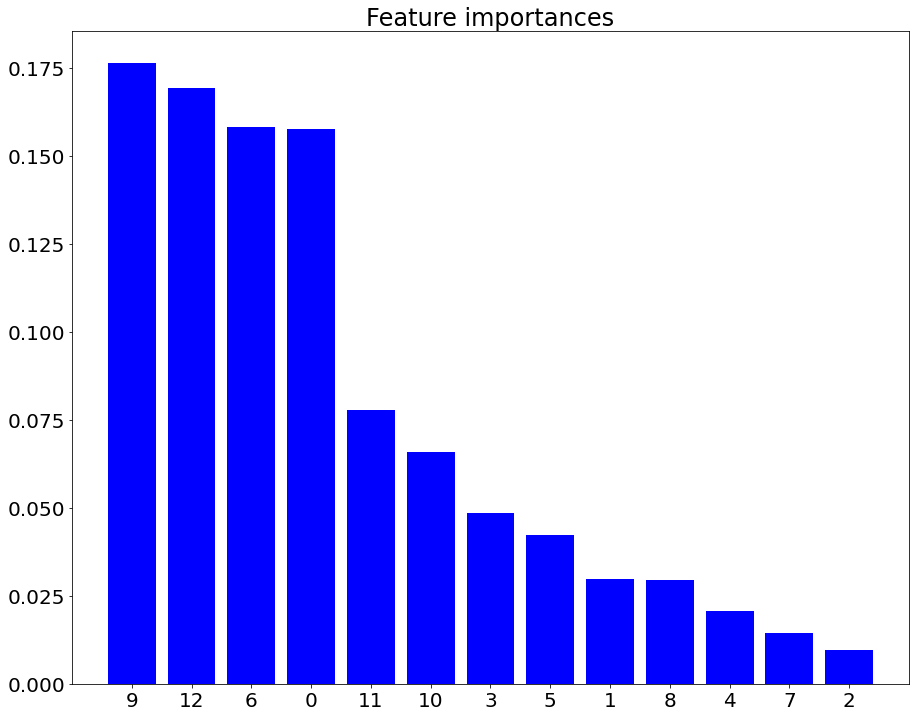

In [33]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(Features)), importances[indices],
        color="b", align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()

[('ash', 0.009631291920457941), ('nonflavanoid_phenols', 0.014464390958803941), ('magnesium', 0.020552262441992084), ('proanthocyanins', 0.029538177858659875), ('malic_acid', 0.02968120529751509), ('total_phenols', 0.042362416037799284), ('alcalinity_of_ash', 0.04845498965830053), ('hue', 0.06581745207866667), ('od280/od315_of_diluted_wines', 0.07774108560764421), ('alcohol', 0.15769704918393546), ('flavanoids', 0.15817944233023967), ('proline', 0.16936022449621838), ('color_intensity', 0.17652001212976678)]


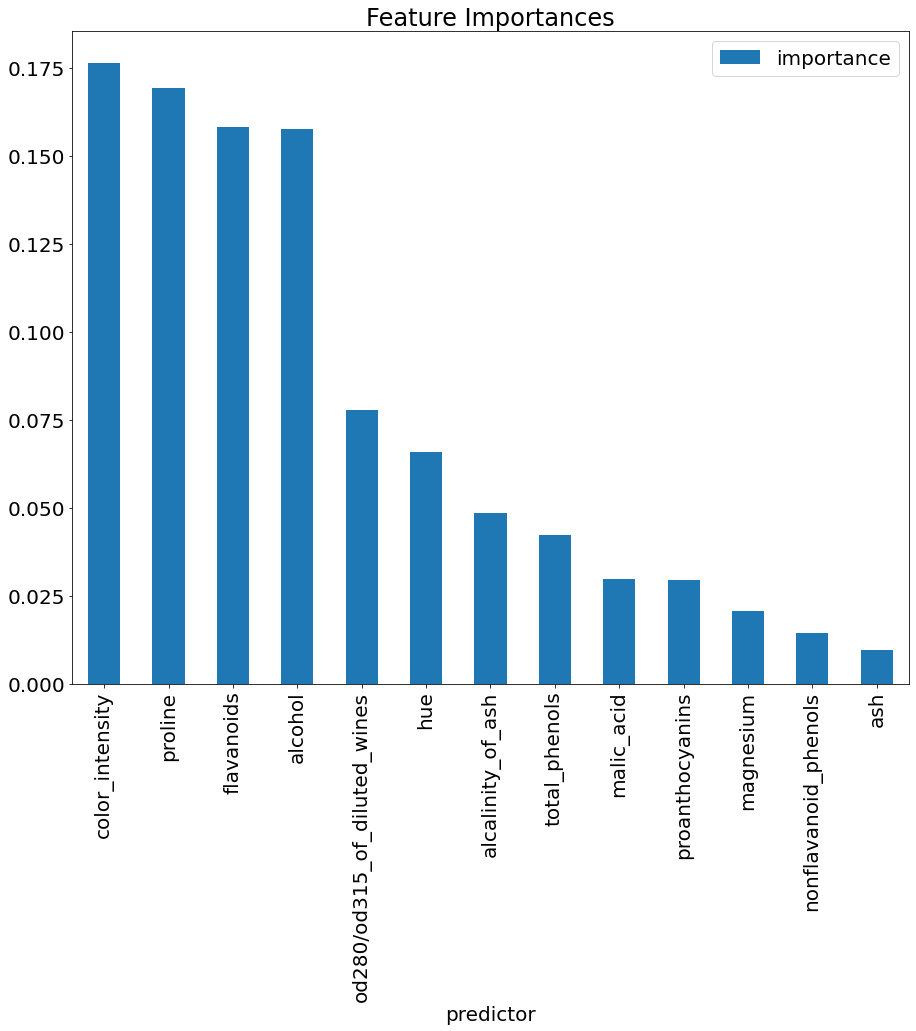

In [26]:
Features = dataset.feature_names
predict_score_RF = list(zip(Features, classifier.feature_importances_))
predict_score_sorted_RF = sorted(predict_score_RF, key=lambda tup: tup[1])
print(predict_score_sorted_RF)
predictions = pd.DataFrame(predict_score_sorted_RF, columns=['predictor', 'importance'])
predictions = predictions.sort_values(['importance'], ascending=False)
predictions.plot(kind='bar', x='predictor', y='importance',title='Feature Importances')

##Advantages

1. Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
2. Less probability of over-fitting when compared with decision tree classifiers
3. Easy to file relative feature importance (as we saw in this example!), which helps in selecting the most contributing features for the classifier. 

References:
https://www.datacamp.com/community/tutorials/random-forests-classifier-python

##Disadvantages


1. Random forest classifiers are less easy to interpret than decision tree classifiers
2. Random forest classifiers can be slower than decision tree classifiers since they are building a bunch of trees

References:
https://www.datacamp.com/community/tutorials/random-forests-classifier-python